# Sentinel-2 Methane Retrieval - Legacy Test Cases
A theoretical and practical review of techniques recently developed to identify and quantify methane plumes / emission sources using Top of Atmosphere shortwave infrared reflectance measurements acquired by the Sentinel-2 MSI sensor.

In [1]:
import os
import yaml
import geopandas as gpd

from munch import munchify

In [2]:
import ee
import geemap

In [3]:
#ee.Authenticate()
ee.Initialize()

In [4]:
# import functions
%run functions.ipynb

In [5]:
# parse workflow into dict
with open( os.path.join( get_root_path(), 's2/cfg/s2-demo.yml' ), 'r', encoding='UTF-8' ) as config:
    config = munchify( yaml.safe_load( config ) )

# Introduction
Methane emissions are anomalous events - it is to be expected that most observations in a time series should not contain excess methane. Assuming surface albedo remains relatively stable over time, a methane free background model may be derived using time series analysis that can be compared with the current observation.

A harmonic function is fitted on a pixel-wise basis to time series of Sentinel-2 TOA RGB and SWIR reflectances acquired over the area of interest 3-6 months prior to the reported emission event. Values for emission event date are computed using time series harmonic models to generate RGB, SWIR1 and SWIR2 background reference images. As noted by [Ehret et al. (2022)](https://arxiv.org/abs/2110.11832), this enhancement to the Multiband Multipass (MBMP) detection algorithm removes the need to manually choose a reference date as background.

# Demonstration

## Algeria

In-house implementation of the Varon et. al.(2021) CH4 retrieval methods was initially evaluated against Sentinel-2 L1C SWIR imagery acquired of super-emission event at a well pad in the Algerian Hassi Messaoud oil field on 20 November 2019. This source was detected in 93 % of cloud-free scenes, with source rates ranging from 2.6 to 51.9 t h−1 (averaging 9.3 t h−1) until it was shut down by a flare lit in August 2020. 

In [6]:
# get scenario and aoi
scenario = get_scenario( config, 'Hassi_Messaoud' )
aoi = get_aoi( scenario )

In [7]:
# get cloud-free scene collocated with emission event 
event = get_best_scene( aoi, 
                        get_date_offset( scenario.event_date ), 
                        get_date_offset( scenario.event_date, 1 ) 
)

# get background image
reference = get_background_images( aoi, 
                                    get_date_offset( scenario.event_date, -180 ), 
                                    get_date_offset( scenario.event_date )
)

Searching: 2019-11-20 -> 2019-11-21
Found 2 scenes ...
... scene 1 of 2: 20191120T101321_20191120T101408_T32SKA
...... masked pixels = 0.0%
...... OK!
Assembling time series 2019-05-24 -> 2019-11-20 ...
... generating blue reference image
... OK!
... generating green reference image
... OK!
... generating red reference image
... OK!
... generating swir1 reference image
... OK!
... generating swir2 reference image
... OK!


slope= 1.1538465138088916
y-intercept= 2.2630326283637417e-06
slope= 1.146433425953927
y-intercept= 1.9338330440407122e-06


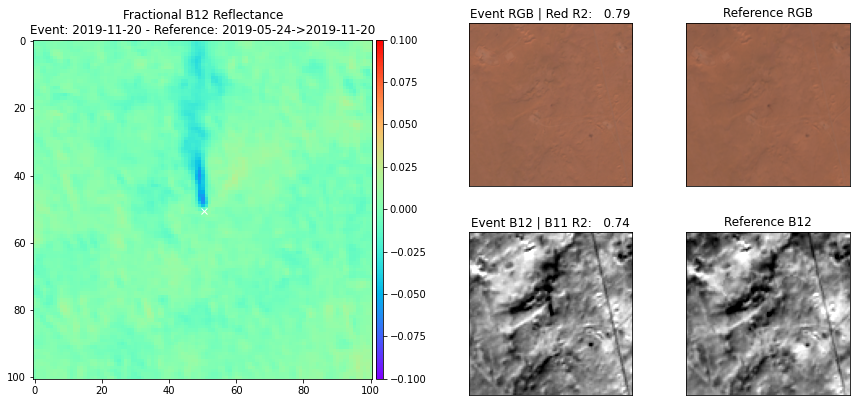

In [8]:
# get delta B12 reflectance using multiband multipass method
delR = get_mbmp( event, reference )
plot_output( event, reference, delR, title='Fractional B12 Reflectance\n', vrange=( -0.1, 0.1 ) )

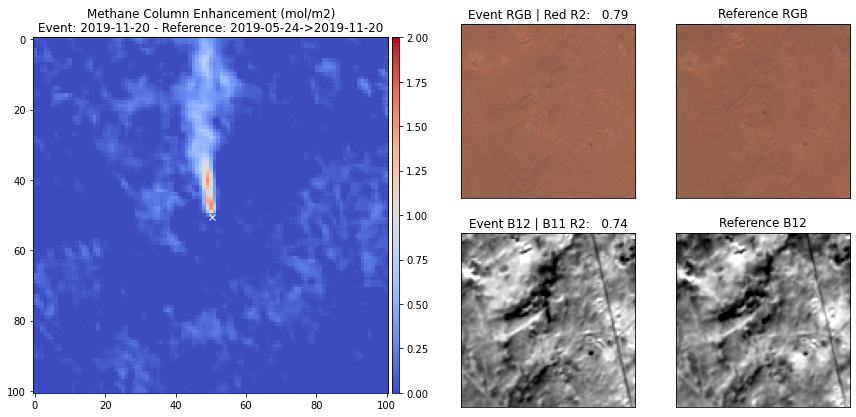

In [9]:
# convert fractional reflectance to column enhancement
omega = convert_delR_to_omega( delR, 
                               event[ 'info' ]['MEAN_SOLAR_ZENITH_ANGLE'], 
                               event[ 'info' ]['MEAN_INCIDENCE_ZENITH_ANGLE_B12'] 
)
plot_output( event, reference, omega, title='Methane Column Enhancement (mol/m2)\n', cmap='coolwarm', vrange=( 0.0, 2.0 ) )

## Turkmenistan

To demonstrate the capabilities of the GHGSat-D demonstration satellite instrument, Varon et al. (2019) focussed on monitoring methane emissions from a compressor station in the Korpezhe oil and gas field of Turkmenistan (August 2015 to November 2020, observed every 5 d). This source was detected in 40 % of cloud-free scenes, with variable intermittency and a 9-month shutdown period in March–December 2019 before it resumed; source rates ranged from 3.5 to 92.9 t h−1 (averaging 20.5 t h−1).

In [10]:
# get scenario and aoi
scenario = get_scenario( config, 'Korpezhe_2' )
aoi = get_aoi( scenario )

In [11]:
# get cloud-free scene collocated with emission event 
event = get_best_scene( aoi, 
                        get_date_offset( scenario.event_date ), 
                        get_date_offset( scenario.event_date, 1 ) 
)

# get background image
reference = get_background_images( aoi, 
                                    get_date_offset( scenario.event_date, -180 ), 
                                    get_date_offset( scenario.event_date )
)

Searching: 2018-06-29 -> 2018-06-30
Found 2 scenes ...
... scene 1 of 2: 20180629T070619_20180629T071300_T39SYC
...... masked pixels = 0.0%
...... OK!
Assembling time series 2017-12-31 -> 2018-06-29 ...
... generating blue reference image
... OK!
... generating green reference image
... OK!
... generating red reference image
... OK!
... generating swir1 reference image
... OK!
... generating swir2 reference image
... OK!


slope= 1.0871418117442384
y-intercept= 1.100314135177499e-06
slope= 1.134720882811715
y-intercept= 1.4223235653560621e-06


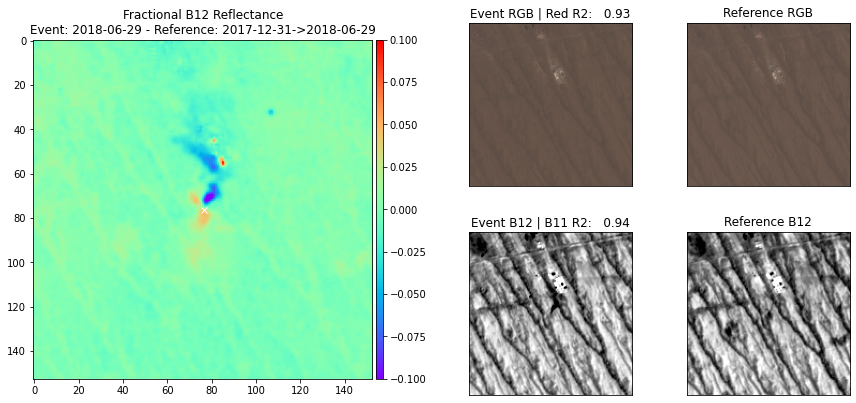

In [12]:
# get delta B12 reflectance using multiband multipass method
delR = get_mbmp( event, reference )
plot_output( event, reference, delR, title='Fractional B12 Reflectance\n', vrange=( -0.1, 0.1 ) )

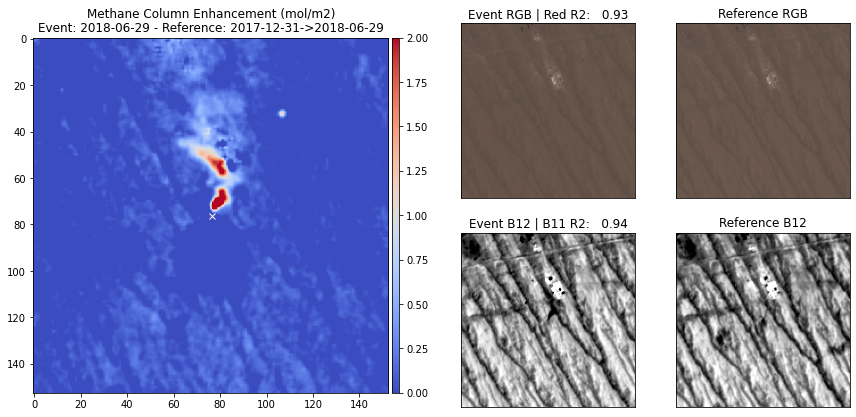

In [13]:
# convert fractional reflectance to column enhancement
omega = convert_delR_to_omega( delR, 
                               event[ 'info' ]['MEAN_SOLAR_ZENITH_ANGLE'], 
                               event[ 'info' ]['MEAN_INCIDENCE_ZENITH_ANGLE_B12'],
)
plot_output( event, reference, omega, title='Methane Column Enhancement (mol/m2)\n', cmap='coolwarm', vrange=( 0.0, 2.0 ) )

## Permian Basin

In [14]:
# get scenario and aoi
scenario = get_scenario( config, 'Permian_Basin_1' )
aoi = get_aoi( scenario )

In [15]:
# get cloud-free scene collocated with emission event 
event = get_best_scene( aoi, 
                        get_date_offset( scenario.event_date ), 
                        get_date_offset( scenario.event_date, 1 ) 
)

# get background image
reference = get_background_images( aoi, 
                                    get_date_offset( scenario.event_date, -180 ), 
                                    get_date_offset( scenario.event_date )
)

Searching: 2020-07-11 -> 2020-07-12
Found 2 scenes ...
... scene 1 of 2: 20200711T171859_20200711T172336_T14SKA
...... masked pixels = 0.0%
...... OK!
Assembling time series 2020-01-13 -> 2020-07-11 ...
... generating blue reference image
... OK!
... generating green reference image
... OK!
... generating red reference image
... OK!
... generating swir1 reference image
... OK!
... generating swir2 reference image
... OK!


slope= 1.3147589771197514
y-intercept= 7.049600202803575e-05
slope= 1.3411770008978599
y-intercept= 7.478112599785505e-05


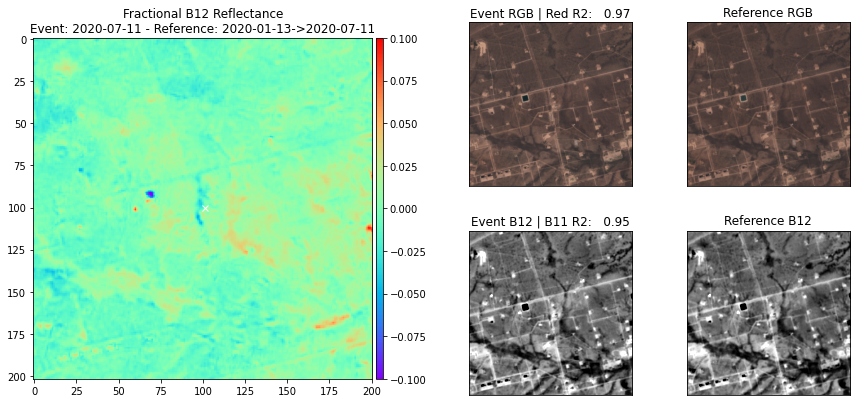

In [16]:
# get delta B12 reflectance using multiband multipass method
delR = get_mbmp( event, reference )
plot_output( event, reference, delR, title='Fractional B12 Reflectance\n', vrange=( -0.1, 0.1 ) )

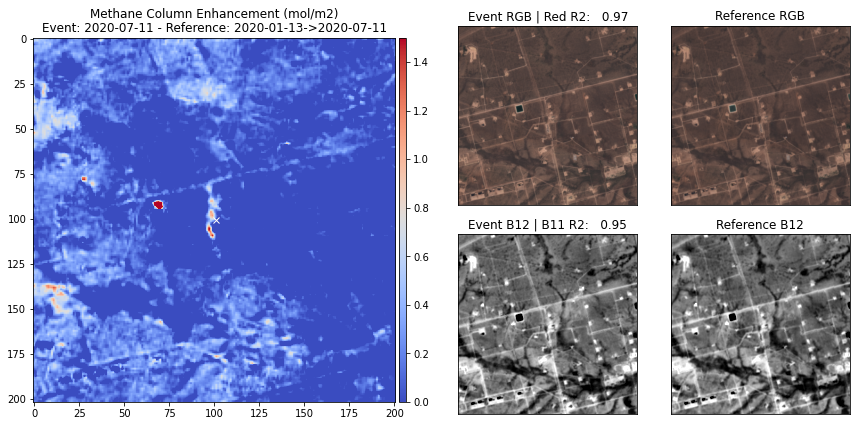

In [17]:
# convert fractional reflectance to column enhancement
omega = convert_delR_to_omega( delR, 
                               event[ 'info' ]['MEAN_SOLAR_ZENITH_ANGLE'], 
                               event[ 'info' ]['MEAN_INCIDENCE_ZENITH_ANGLE_B12'] 
)
plot_output( event, reference, omega, title='Methane Column Enhancement (mol/m2)\n', cmap='coolwarm', vrange=(0.0, 1.5) )

In [18]:
# get scenario and aoi
scenario = get_scenario( config, 'Permian_Basin_2' )
aoi = get_aoi( scenario )

In [19]:
# get cloud-free scene collocated with emission event 
event = get_best_scene( aoi, 
                        get_date_offset( scenario.event_date ), 
                        get_date_offset( scenario.event_date, 1 ) 
)

# get background image
reference = get_background_images( aoi, 
                                    get_date_offset( scenario.event_date, -180 ), 
                                    get_date_offset( scenario.event_date )
)

Searching: 2020-07-16 -> 2020-07-17
Found 2 scenes ...
... scene 1 of 2: 20200716T171901_20200716T173445_T14SKA
...... masked pixels = 0.0%
...... OK!
Assembling time series 2020-01-18 -> 2020-07-16 ...
... generating blue reference image
... OK!
... generating green reference image
... OK!
... generating red reference image
... OK!
... generating swir1 reference image
... OK!
... generating swir2 reference image
... OK!


slope= 1.3378633076948492
y-intercept= 7.032392396212256e-05
slope= 1.331131371959057
y-intercept= 7.511586727749536e-05


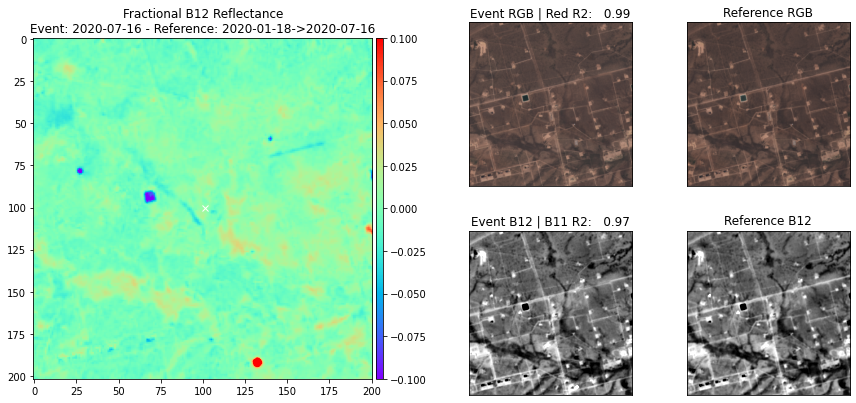

In [20]:
# get delta B12 reflectance using multiband multipass method
delR = get_mbmp( event, reference )
plot_output( event, reference, delR, title='Fractional B12 Reflectance\n', vrange=( -0.1, 0.1 ) )

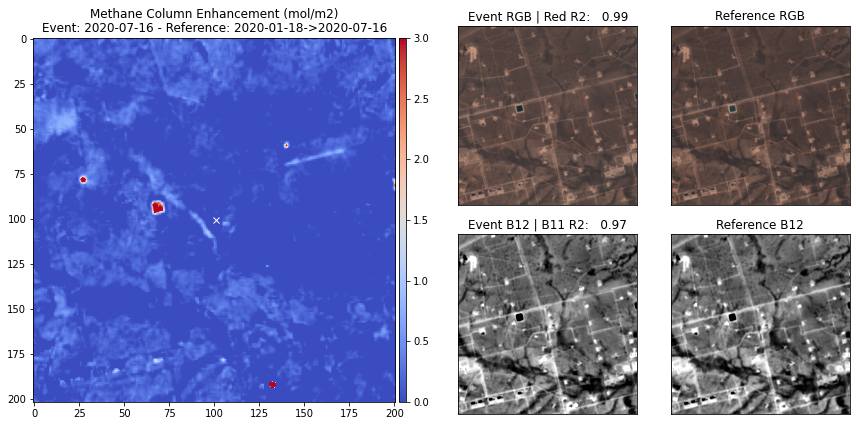

In [21]:
# convert fractional reflectance to column enhancement
omega = convert_delR_to_omega( delR, 
                               event[ 'info' ]['MEAN_SOLAR_ZENITH_ANGLE'], 
                               event[ 'info' ]['MEAN_INCIDENCE_ZENITH_ANGLE_B12'] 
)
plot_output( event, reference, omega, title='Methane Column Enhancement (mol/m2)\n', cmap='coolwarm', vrange=(0.0, 3.0) )